# EV Analysis

In [5]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

import warnings
from datetime import datetime
warnings.filterwarnings("ignore")

### Data Import

In [ ]:
# Load the data
ev_perf = pd.read_csv("D:\Semester 3\Capstone Project\Ev Per.csv")

## Data Overview
- Check out the data

- What you are looking for?
    - look for missing values
    - look for abnormalities
    - Do you need to parse the data?
    - Do you need to change the column name?
    - Do you need to standardize data?
    - Is there any data conflicts you need to change or remove?

In [5]:
ev_perf

,Model year,Make,Model,Vehicle class,Motor (kW),Transmission,Fuel type,City (kWh/100 km),Highway (kWh/100 km),Combined (kWh/100 km),City (Le/100 km),Highway (Le/100 km),Combined (Le/100 km),Range (km),CO2 emissions (g/km),CO2 rating,Smog rating,Recharge time (h)
0,2012,Mitsubishi,i-MiEV,Subcompact,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,100,0,NaN,NaN,7.0
1,2012,Nissan,LEAF,Mid-size,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,117,0,NaN,NaN,7.0
2,2013,Ford,Focus Electric,Compact,107,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,122,0,NaN,NaN,4.0
3,2013,Mitsubishi,i-MiEV,Subcompact,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,100,0,NaN,NaN,7.0
4,2013,Nissan,LEAF,Mid-size,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,117,0,NaN,NaN,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,2024,Volkswagen,ID.4 AWD Pro S,Sport utility vehicle: Small,250,A1,B,19.4,21.9,20.5,2.2,2.5,2.3,423,0,10.0,10.0,8.0
683,2024,Volvo,C40 Recharge,Sport utility vehicle: Small,185,A1,B,17.8,21.8,19.6,2.0,2.4,2.2,478,0,10.0,10.0,8.0
684,2024,Volvo,C40 Recharge Twin,Sport utility vehicle: Small,300,A1,B,19.8,23.0,21.2,2.2,2.6,2.4,414,0,10.0,10.0,8.0
685,2024,Volvo,XC40 Recharge,Sport utility vehicle: Small,185,A1,B,17.8,22.0,19.7,2.0,2.5,2.2,472,0,10.0,10.0,8.0


In [6]:
ev_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687 entries, 0 to 686
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Model year             687 non-null    int64  
 1   Make                   687 non-null    object 
 2   Model                  687 non-null    object 
 3   Vehicle class          687 non-null    object 
 4   Motor (kW)             687 non-null    int64  
 5   Transmission           687 non-null    object 
 6   Fuel type              687 non-null    object 
 7   City (kWh/100 km)      687 non-null    float64
 8   Highway (kWh/100 km)   687 non-null    float64
 9   Combined (kWh/100 km)  687 non-null    float64
 10  City (Le/100 km)       687 non-null    float64
 11  Highway (Le/100 km)    687 non-null    float64
 12  Combined (Le/100 km)   687 non-null    float64
 13  Range (km)             687 non-null    int64  
 14  CO2 emissions (g/km)   687 non-null    int64  
 15  CO2 ra

In [7]:
ev_perf.isnull().sum()

,0
Model year,0
Make,0
Model,0
Vehicle class,0
Motor (kW),0
Transmission,0
Fuel type,0
City (kWh/100 km),0
Highway (kWh/100 km),0
Combined (kWh/100 km),0


In [8]:
ev_perf.nunique()

,0
Model year,13
Make,33
Model,376
Vehicle class,10
Motor (kW),110
Transmission,2
Fuel type,1
City (kWh/100 km),152
Highway (kWh/100 km),147
Combined (kWh/100 km),144


In [9]:
print(ev_perf.columns)

Index(['Model year', 'Make', 'Model', 'Vehicle class', 'Motor (kW)',
       'Transmission', 'Fuel type', 'City (kWh/100 km)',
       'Highway (kWh/100 km)', 'Combined (kWh/100 km)', 'City (Le/100 km)',
       'Highway (Le/100 km)', 'Combined (Le/100 km)', 'Range (km)',
       'CO2 emissions (g/km)', 'CO2 rating', 'Smog rating',
       'Recharge time (h)'],
      dtype='object')


In [10]:
for column in ev_perf:
    unique_values = ev_perf[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in Model year: [2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024]
Unique values in Make: ['Mitsubishi' 'Nissan' 'Ford' 'smart' 'Tesla' 'Chevrolet' 'BMW' 'Kia'
 'Hyundai' 'Volkswagen' 'Audi' 'Jaguar' 'smart EQ' 'MINI' 'Porsche'
 'Polestar' 'Volvo' 'Lucid' 'Mazda' 'Mercedes-Benz' 'Rivian' 'Cadillac'
 'Fisker' 'Genesis' 'Lexus' 'Subaru' 'Toyota' 'VinFast' 'Acura' 'FIAT'
 'GMC' 'Honda' 'Rolls-Royce']
Unique values in Model: ['i-MiEV' 'LEAF' 'Focus Electric' 'fortwo electric drive cabriolet'
 'fortwo electric drive coupe' 'Model S (40 kWh)' 'Model S (60 kWh)'
 'Model S (85 kWh)' 'Model S Performance' 'Spark EV' 'i3' 'Soul EV'
 'Model S (70 kWh)' 'Model S (85/90 kWh)' 'Model S 70D' 'Model S 85D/90D'
 'Model S P85D/P90D' 'LEAF (24 kWh)' 'LEAF (30 kWh)'
 'Model S (60 kWh pre- 6/16)' 'Model S (75 kWh)' 'Model S 60D'
 'Model S 75D' 'Model S 90D (Refresh)' 'Model S P90D (Refresh)'
 'Model S P100D' 'Model X 60D' 'Model X 75D' 'Model X 90D' 'Model X P90D'
 'Model X P10

## Data Cleaning

- Clean data based on data overview

`After the data overview, we can conclude that a part of the missing values in the "TotalCharges" column is clean for further analysis.`

`We can drop the rows where data is missing because there are 11 rows out of a total of 7043, which is approximately 0.15% of the data. You can always replace the data or remove it with a proper explanation if the missing data is more than 0.50% of the total data population.`

In [11]:
ev_perf.isnull().mean() * 100

,0
Model year,0.000000
Make,0.000000
Model,0.000000
Vehicle class,0.000000
Motor (kW),0.000000
Transmission,0.000000
Fuel type,0.000000
City (kWh/100 km),0.000000
Highway (kWh/100 km),0.000000
Combined (kWh/100 km),0.000000


In [12]:
ev_perf=ev_perf.drop(['CO2 emissions (g/km)','CO2 rating','Smog rating'],axis=1)

In [13]:
ev_perf.head(5)

,Model year,Make,Model,Vehicle class,Motor (kW),Transmission,Fuel type,City (kWh/100 km),Highway (kWh/100 km),Combined (kWh/100 km),City (Le/100 km),Highway (Le/100 km),Combined (Le/100 km),Range (km),Recharge time (h)
0,2012,Mitsubishi,i-MiEV,Subcompact,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,100,7.0
1,2012,Nissan,LEAF,Mid-size,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,117,7.0
2,2013,Ford,Focus Electric,Compact,107,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,122,4.0
3,2013,Mitsubishi,i-MiEV,Subcompact,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,100,7.0
4,2013,Nissan,LEAF,Mid-size,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,117,7.0


In [14]:
ev_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687 entries, 0 to 686
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Model year             687 non-null    int64  
 1   Make                   687 non-null    object 
 2   Model                  687 non-null    object 
 3   Vehicle class          687 non-null    object 
 4   Motor (kW)             687 non-null    int64  
 5   Transmission           687 non-null    object 
 6   Fuel type              687 non-null    object 
 7   City (kWh/100 km)      687 non-null    float64
 8   Highway (kWh/100 km)   687 non-null    float64
 9   Combined (kWh/100 km)  687 non-null    float64
 10  City (Le/100 km)       687 non-null    float64
 11  Highway (Le/100 km)    687 non-null    float64
 12  Combined (Le/100 km)   687 non-null    float64
 13  Range (km)             687 non-null    int64  
 14  Recharge time (h)      687 non-null    float64
dtypes: flo

In [15]:
ev_perf.isnull().sum()

,0
Model year,0
Make,0
Model,0
Vehicle class,0
Motor (kW),0
Transmission,0
Fuel type,0
City (kWh/100 km),0
Highway (kWh/100 km),0
Combined (kWh/100 km),0


In [16]:
print(ev_perf['Vehicle class'].unique())

['Subcompact' 'Mid-size' 'Compact' 'Two-seater' 'Full-size'
 'Station wagon: Small' 'Sport utility vehicle: Standard'
 'Sport utility vehicle: Small' 'Pickup truck: Standard' 'Minicompact']


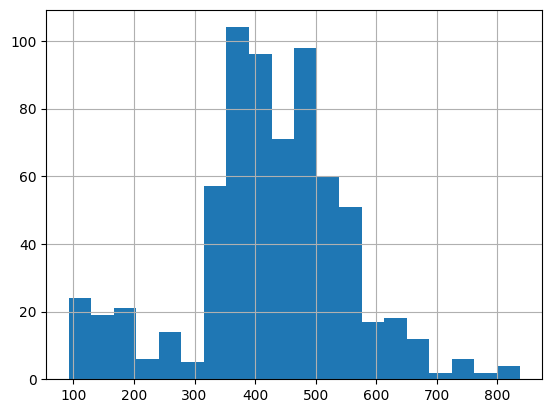

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
ev_perf['Range (km)'].hist(bins=20)
plt.show()

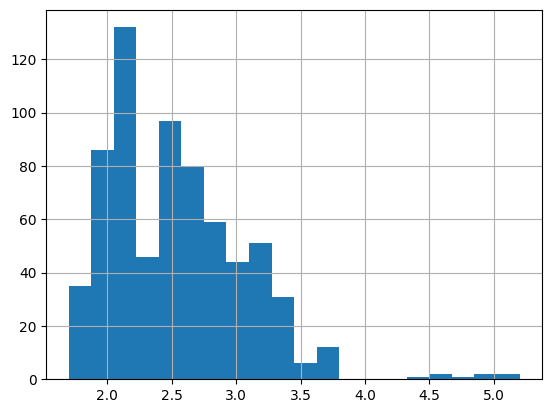

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
ev_perf['Combined (Le/100 km)'].hist(bins=20)
plt.show()

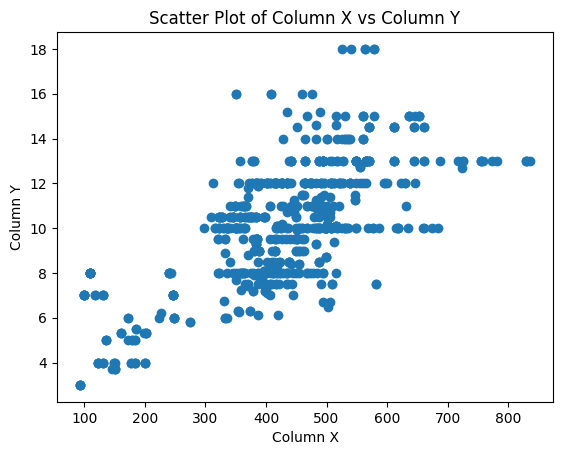

In [19]:
import matplotlib.pyplot as plt

# Replace 'column_x' and 'column_y' with the names of your numerical columns
plt.scatter(ev_perf['Range (km)'], ev_perf['Recharge time (h)'])
plt.xlabel('Column X')
plt.ylabel('Column Y')
plt.title('Scatter Plot of Column X vs Column Y')
plt.show()

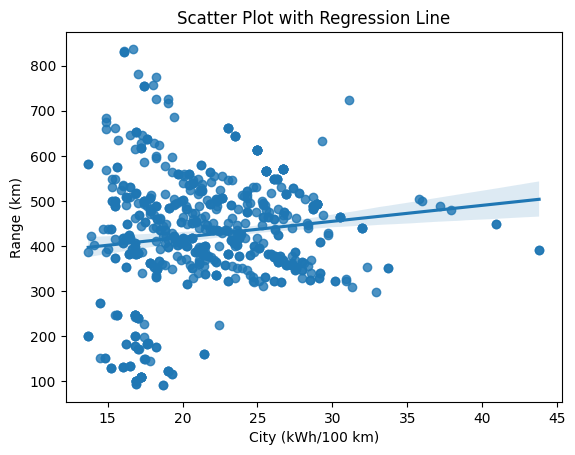

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x='City (kWh/100 km)', y='Range (km)', data=ev_perf)
plt.title('Scatter Plot with Regression Line')
plt.show()

In [21]:
ev_perf=ev_perf.drop(['Make','Model','City (Le/100 km)','Highway (Le/100 km)','Combined (Le/100 km)','Transmission','Fuel type'],axis=1)

In [22]:
print(ev_perf.dtypes)

Model year                 int64
Vehicle class             object
Motor (kW)                 int64
City (kWh/100 km)        float64
Highway (kWh/100 km)     float64
Combined (kWh/100 km)    float64
Range (km)                 int64
Recharge time (h)        float64
dtype: object


### Feature Engineering

In [23]:
ev_perf['Vehicle Age'] = datetime.now().year - ev_perf['Model year']

In [24]:
ev_perf['battery_capacity'] = ev_perf['Combined (kWh/100 km)'] /  ev_perf['Range (km)'] * 100

In [25]:
# Calculate thresholds dynamically
ideal_threshold = ev_perf['Range (km)'].quantile(0.75)
mild_threshold = ev_perf['Range (km)'].quantile(0.50)
adverse_threshold = ev_perf['Range (km)'].quantile(0.25)

# Categorize dynamically
def categorize_dynamic(range_km):
    if range_km >= ideal_threshold:
        return "Ideal"
    elif mild_threshold <= range_km < ideal_threshold:
        return "Mild"
    elif adverse_threshold <= range_km < mild_threshold:
        return "Adverse"
    else:
        return "Severe"

# Apply the dynamic function
ev_perf['Weather Condition'] = ev_perf['Range (km)'].apply(categorize_dynamic)

In [26]:
def categorize_driving_pattern(row):
    city_highway_ratio = row['City (kWh/100 km)'] / row['Highway (kWh/100 km)']
    city_highway_deviation = abs(row['City (kWh/100 km)'] - row['Highway (kWh/100 km)'])

    if city_highway_ratio > 1:
        return "Aggressive"
    elif city_highway_deviation < 2:
        return "Eco-Friendly"
    else:
        return "Mixed"

# Apply function row-wise
ev_perf['Driving Pattern'] = ev_perf.apply(categorize_driving_pattern, axis=1)


In [27]:
# Function to maintenance requirement
def maintenance(row):

    # Define maintenance conditions
    if row['Vehicle Age'] > 8 or row['Recharge time (h)'] > 7 or row['Range (km)'] < 400:
        return 1
    else:
        return 0

# Apply the function
ev_perf['Maintenance'] = ev_perf.apply(maintenance, axis=1)

In [28]:
# Assign impact values
weather_map = {"Ideal": 0, "Mild": 1, "Adverse": 2, "Severe": 3}
driving_map = {"Eco-Friendly": 0, "Mixed": 1, "Aggressive": 2}

# Apply mapping
ev_perf["Weather Condition"] = ev_perf["Weather Condition"].map(weather_map)
ev_perf["Driving Pattern"] = ev_perf["Driving Pattern"].map(driving_map)

In [29]:
ev_perf["Traffic Congestion"] = (ev_perf["Combined (kWh/100 km)"] / ev_perf["Range (km)"]) + ev_perf["Weather Condition"] + ev_perf["Driving Pattern"]

In [30]:
ev_perf["Brake Usage"] = (ev_perf["Traffic Congestion"] / ev_perf["Traffic Congestion"].max()) * 10

In [31]:
ev_perf["Range Efficiency"] = ev_perf["Range (km)"] / ev_perf["battery_capacity"]
ev_perf["Power Loss"] = ((ev_perf["battery_capacity"] - ev_perf["Range Efficiency"]) / ev_perf["battery_capacity"]) + (ev_perf["Brake Usage"] / 10) + (ev_perf["Weather Condition"] / 10)

In [32]:
ev_perf

,Model year,Vehicle class,Motor (kW),City (kWh/100 km),Highway (kWh/100 km),Combined (kWh/100 km),Range (km),Recharge time (h),Vehicle Age,battery_capacity,Weather Condition,Driving Pattern,Maintenance,Traffic Congestion,Brake Usage,Range Efficiency,Power Loss
0,2012,Subcompact,49,16.9,21.4,18.7,100,7.0,13,18.700000,3,1,1,4.187000,8.195783,5.347594,1.833611
1,2012,Mid-size,80,19.3,23.0,21.1,117,7.0,13,18.034188,3,1,1,4.180342,8.182750,6.487678,1.758532
2,2013,Compact,107,19.0,21.1,20.0,122,4.0,12,16.393443,3,1,1,4.163934,8.150634,7.442000,1.661101
3,2013,Subcompact,49,16.9,21.4,18.7,100,7.0,12,18.700000,3,1,1,4.187000,8.195783,5.347594,1.833611
4,2013,Mid-size,80,19.3,23.0,21.1,117,7.0,12,18.034188,3,1,1,4.180342,8.182750,6.487678,1.758532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,2024,Sport utility vehicle: Small,250,19.4,21.9,20.5,423,8.0,1,4.846336,2,1,1,3.048463,5.967171,87.282439,-16.213269
683,2024,Sport utility vehicle: Small,185,17.8,21.8,19.6,478,8.0,1,4.100418,1,1,1,2.041004,3.995134,116.573469,-26.930139
684,2024,Sport utility vehicle: Small,300,19.8,23.0,21.2,414,8.0,1,5.120773,2,1,1,3.051208,5.972543,80.847170,-13.990825
685,2024,Sport utility vehicle: Small,185,17.8,22.0,19.7,472,8.0,1,4.173729,1,1,1,2.041737,3.996569,113.088325,-25.595617


### Label Encoder

In [33]:
label_encoder = LabelEncoder()

ev_perf['Vehicle class'] = label_encoder.fit_transform(ev_perf['Vehicle class'])
ev_perf['Driving Pattern'] = label_encoder.fit_transform(ev_perf['Driving Pattern'])
ev_perf['Weather Condition'] = label_encoder.fit_transform(ev_perf['Weather Condition'])

### Correlation Heatmap

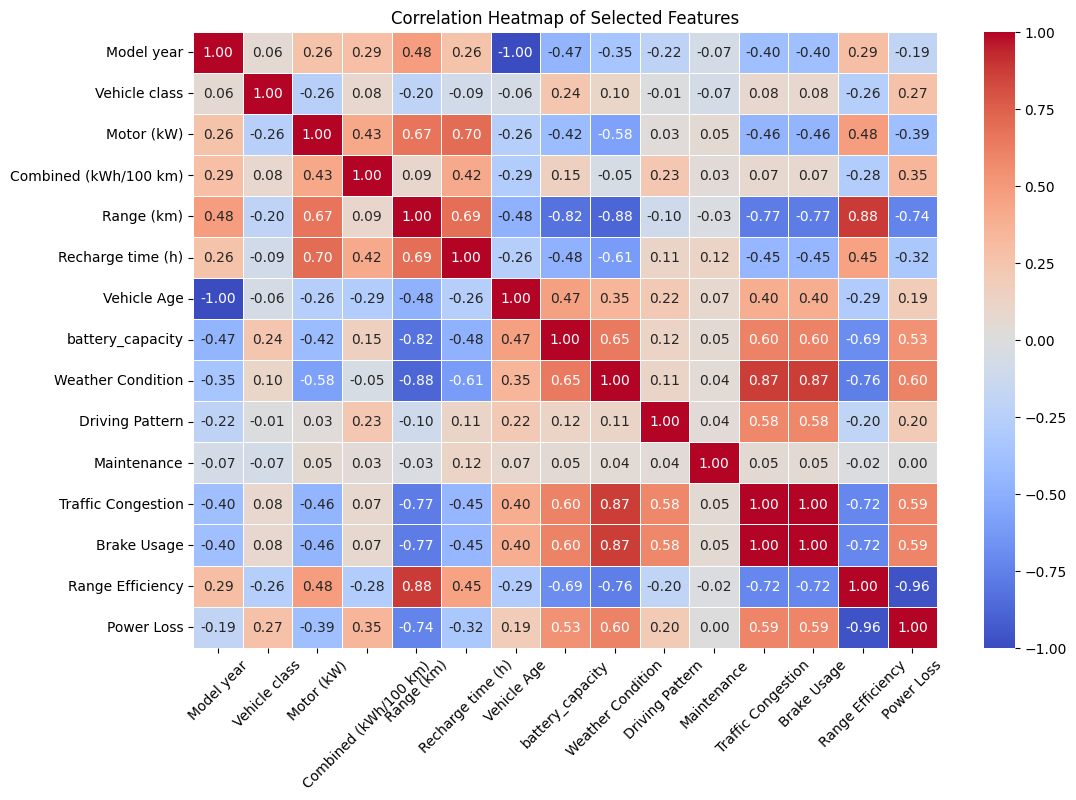

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

selected_features = ['Model year', 'Vehicle class', 'Motor (kW)', 'Combined (kWh/100 km)',
                     'Range (km)', 'Recharge time (h)', 'Vehicle Age', 'battery_capacity',
                     'Weather Condition', 'Driving Pattern', 'Maintenance', 'Traffic Congestion', 'Brake Usage',
                     'Range Efficiency', 'Power Loss']

correlation_matrix = ev_perf[selected_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Selected Features')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

### Building a model
### Semi-supervised approach first Clustering and than Random Forest Regressor

In [35]:
features_for_clustering = ['Model year', 'Vehicle class', 'Motor (kW)', 'City (kWh/100 km)',
       'Highway (kWh/100 km)', 'Combined (kWh/100 km)', 'Range (km)',
       'Recharge time (h)', 'Vehicle Age', 'battery_capacity',
       'Weather Condition', 'Driving Pattern', 'Maintenance',
       'Traffic Congestion', 'Brake Usage', 'Range Efficiency', 'Power Loss']

# Normalize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(ev_perf[features_for_clustering])

kmeans = KMeans(n_clusters=5, random_state=42)
ev_perf['Performance Cluster'] = kmeans.fit_predict(X_scaled)

# Convert Clusters to Performance Index
ev_perf['Performance Index'] = ev_perf['Performance Cluster'].map({0: 50, 1: 100, 2: 150, 3: 200, 4: 250})

### Model 1
### Random Forest Regression

In [36]:
from sklearn.metrics import mean_squared_error

X = ev_perf.drop(['Performance Index', 'Performance Cluster'], axis=1)
y = ev_perf['Performance Index']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")
print(f"Mean Squared Error (MSE): {mse:.4f}")

Mean Absolute Error (MAE): 11.5
R² Score: 0.8998465024583739
Mean Squared Error (MSE): 553.5290


### Hyperparameter Tuning

In [37]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Define the model
rf = RandomForestRegressor(random_state=42)

# The hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Use RandomizedSearchCV for faster tuning
random_search = RandomizedSearchCV(rf, param_distributions=param_grid,
                                   n_iter=10, cv=5, scoring='neg_mean_absolute_error',
                                   n_jobs=-1, verbose=2, random_state=42)

# Fit the model on your dataset
random_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters:", random_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}


### Cross Validation

In [38]:
# Evaluate with cross-validation
best_rf = random_search.best_estimator_
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='r2')

print(f"Cross-validation R² Scores: {cv_scores}")
print(f"Mean R² Score: {np.mean(cv_scores)}")

y_pred = best_rf.predict(X_test)

# Evaluate final model
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Final Model MAE: {mae}")
print(f"Final Model R² Score: {r2}")
print(f"Mean Squared Error (MSE): {mse:.4f}")

Cross-validation R² Scores: [0.94315023 0.77285365 0.91017809 0.8780567  0.9009212 ]
Mean R² Score: 0.8810319735207971
Final Model MAE: 11.315217391304348
Final Model R² Score: 0.9174343649794542
Mean Squared Error (MSE): 456.3243


### Visualize feature importance

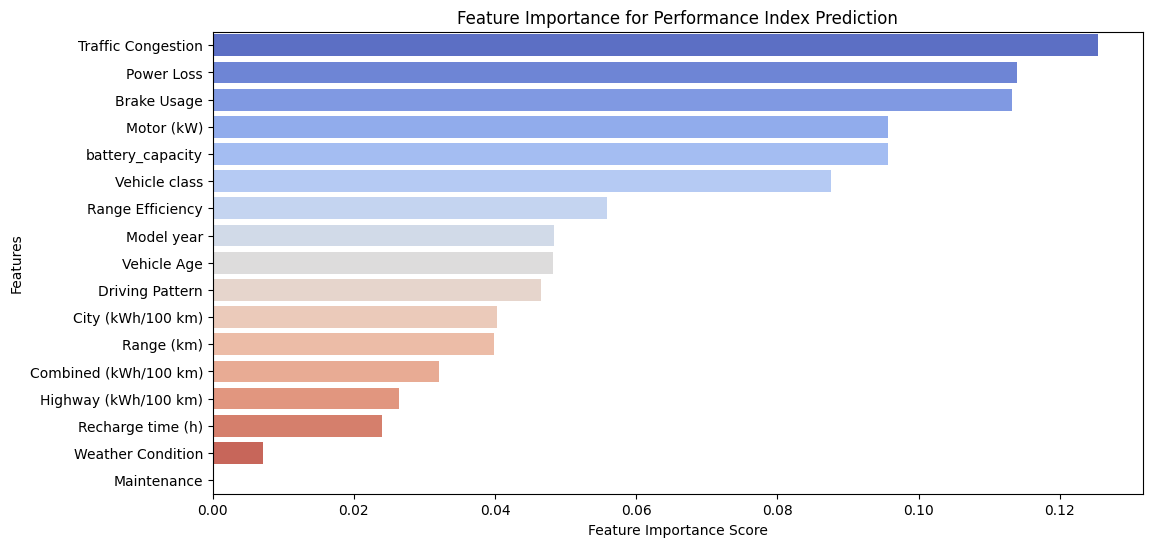

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extract feature importance scores
feature_importance = random_search.best_estimator_.feature_importances_

features = X_train.columns
imp_features = pd.DataFrame({'Feature': features, 'Importance': feature_importance})

# Sort by importance
imp_features = imp_features.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=imp_features, palette='coolwarm')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance for Performance Index Prediction')
plt.show()

### Model 2
### Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = ev_perf.drop(['Performance Index', 'Performance Cluster'], axis=1)
y = ev_perf['Performance Index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 39.8548
Mean Squared Error (MSE): 2480.1101
R² Score: 0.5513


### Cross Validation

In [41]:
lr = LinearRegression()
cv_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-Validation R² scores: {cv_scores}")
print(f"Average CV R²: {np.mean(cv_scores):.4f}")

y_pred = model.predict(X_test)

# Evaluate final model
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Final Model MAE: {mae}")
print(f"Final Model R² Score: {r2}")
print(f"Mean Squared Error (MSE): {mse:.4f}")

Cross-Validation R² scores: [0.66944408 0.38464907 0.66036816 0.59411875 0.62202718]
Average CV R²: 0.5861
Final Model MAE: 39.85481937022662
Final Model R² Score: 0.5512580023975362
Mean Squared Error (MSE): 2480.1101


### Visualize feature importance

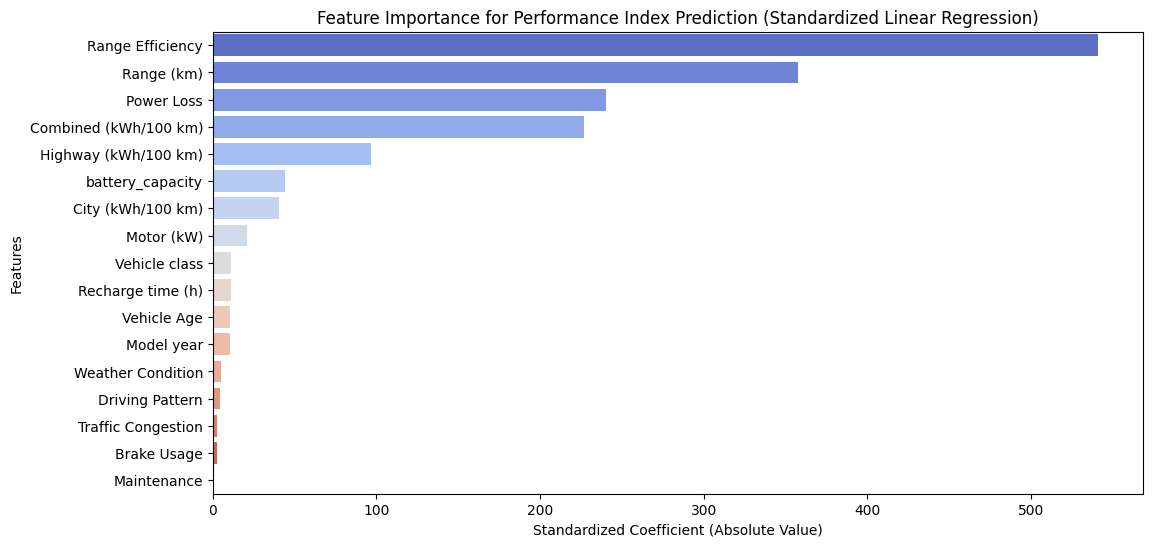

In [42]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Fit linear model on standardized features
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Extract standardized coefficients
coefficients = linear_model.coef_
features = X_train.columns

# Create feature importance DataFrame
imp_features = pd.DataFrame({
    'Feature': features,
    'Importance': np.abs(coefficients)
})

# Sort by importance
imp_features = imp_features.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=imp_features, palette='coolwarm')
plt.xlabel('Standardized Coefficient (Absolute Value)')
plt.ylabel('Features')
plt.title('Feature Importance for Performance Index Prediction (Standardized Linear Regression)')
plt.show()


### There is no parameter tuning in linear regression.

### Model 3
### XGBoost

In [43]:
import xgboost as xgb

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 11.1168
Mean Squared Error (MSE): 516.4496
R² Score: 0.9066


### Parameter tuning with the help of GridsearchCV

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_

y_pred = best_xgb.predict(X_test)

print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}


### Cross Validation

In [45]:
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='r2')

# Print cross-validation results
print(f"Cross-validation R² Scores: {cv_scores}")
print(f"Mean Cross-validation R² Score: {np.mean(cv_scores):.4f}")

# Fit the model on the full training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate final model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Final Model MAE: {mae:.4f}")
print(f"Final Model MSE: {mse:.4f}")
print(f"Final Model R² Score: {r2:.4f}")

Cross-validation R² Scores: [0.93791604 0.76663202 0.89794022 0.84425622 0.90509903]
Mean Cross-validation R² Score: 0.8704
Final Model MAE: 11.4374
Final Model MSE: 800.2646
Final Model R² Score: 0.8552


### Vizualize feature importance

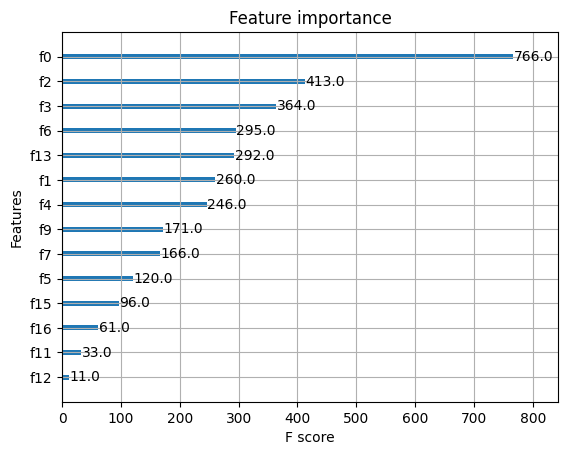

In [46]:
import matplotlib.pyplot as plt
xgb.plot_importance(xgb_model)
plt.show()

### Model 4
### Artificial Neural Network (ANN)

In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build ANN Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input Layer
    Dropout(0.3),  # Prevent Overfitting
    Dense(32, activation='relu'),  # Hidden Layer
    Dense(16, activation='relu'),  # Hidden Layer
    Dense(1)  # Output Layer for Regression
])

# Compile the Model
model.compile(optimizer='adam', loss='mae', metrics=['mse'])

# Train the Model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=16, verbose=1)

# Evaluate the Model
loss, mse = model.evaluate(X_test, y_test)
print(f"Mean Squared Error: {mse:.4f}")

# Make Predictions
y_pred = model.predict(X_test)


Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 168.2282 - mse: 33418.3516 - val_loss: 167.4689 - val_mse: 33606.8789
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 171.2585 - mse: 34351.5352 - val_loss: 158.3029 - val_mse: 30829.0117
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 149.8487 - mse: 28000.0293 - val_loss: 119.8656 - val_mse: 20605.7871
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 101.2831 - mse: 15859.4785 - val_loss: 85.3734 - val_mse: 11275.9121
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 75.6053 - mse: 9213.5557 - val_loss: 74.1095 - val_mse: 9252.8252
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 64.3156 - mse: 7194.3286 - val_loss: 63.5726 - val_mse: 6353.2764
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 53.2511 - mse: 4667.8662 - val_loss: 52.6177 - val_mse: 4546.0913
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 46.6073 - mse: 3699.3701 - val_loss: 47.2936 - val_mse: 393

In [48]:
y_pred = model.predict(X_test).flatten()

# Evaluate metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Absolute Error: 29.8345
R² Score: 0.6913
